In [4]:
# loading the fashion mnist dataset
import sklearn
from matplotlib import pyplot
from keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
import numpy as np


import matplotlib
import matplotlib.pyplot as plt

In [5]:
def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


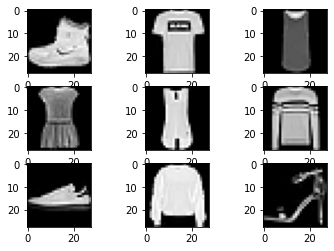

In [6]:
# load dataset
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [7]:
#train_X[0]
#נשים לב שה"פינות" שחורות כלומר הפיצרים הם 0

In [8]:
train_X = train_X/255.0

In [9]:
img =[]

for i in range ( len(train_X)):
    img.append(np.reshape(train_X[i] , 784))

In [10]:
train_X = img
train_X = np.array(train_X)
train_X.shape

(60000, 784)

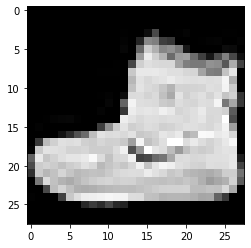

In [11]:
# הצגת תמונה 
img2 =[]

for i in range ( len(train_X)):
    img2.append(train_X[i].reshape( 28 , 28))


pyplot.imshow(img2[0], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# Dimensionality reduction- הקטנת מספר הפיצ'רים לפיצ'רים החשובים יותר וויתור על הפיצ'רים שלא משפיעים הרבה על התחזית.

In [12]:
 #the PCA algorithem  : כך נדאג שנצמצם את הפיצרים אבל לא נאבד הרבה מידע
    # First it identifies the hyperplane that lies closest to the data, and then
# it projects the data onto it,

In [13]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(train_X)

In [14]:
X2D.shape

(60000, 2)

In [15]:
(X2D)

array([[-0.48625016,  6.40421332],
       [ 5.52128962, -1.77114249],
       [-2.846709  , -4.32093387],
       ...,
       [ 3.36372626, -4.62839288],
       [-3.16657461, -2.2792897 ],
       [-7.12025023, -0.46958174]])

ננסה עם מספר אחר של צירים:

In [16]:
pca = PCA(n_components = 150)
X2D = pca.fit_transform(train_X)

In [17]:
X2D

array([[-0.48625016,  6.40421332, -4.74918114, ..., -0.22664216,
        -0.21614998, -0.07555139],
       [ 5.52128962, -1.77114249, -1.02363543, ...,  0.1638098 ,
        -0.02842079,  0.18988553],
       [-2.846709  , -4.32093387,  0.41629115, ..., -0.05193908,
         0.10283283,  0.01975349],
       ...,
       [ 3.36372626, -4.62839288, -2.04193723, ..., -0.40961043,
         0.10755912, -0.22239495],
       [-3.16657461, -2.2792897 ,  1.88360748, ..., -0.02538357,
         0.02789119,  0.12794827],
       [-7.12025023, -0.46958174,  1.83887764, ...,  0.01454561,
        -0.09992872, -0.00953731]])

In [18]:
X2D.shape

(60000, 150)

In [19]:
#נבדוק כמה אחוז מהדאטה מוסבר כך. 
sum =0 
for i in range(len(pca.explained_variance_ratio_)):
    sum += pca.explained_variance_ratio_[i]
sum 

0.9370007614146314

In [20]:
# כדי לראות שאנחנו מכסים את רוב השונות בדאטה באלגוריתם שלנו - נגדיר לו שאנו מעוניינים ב0.95 אחוז מהשונות...
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(train_X)

In [21]:
#נבחין כי כעת לכל תמונה יש רק 187 פיצרים במקום 784
X_reduced.shape  

(60000, 187)

In [22]:
train_X.shape

(60000, 784)

In [23]:
print(pca.explained_variance_ratio_)

# 29.% of the dataset’s variance  lies along the first axis, and 17.7% on the second , and 6% at the third...

[0.29039228 0.1775531  0.06019222 0.04957428 0.03847655 0.03460769
 0.02341691 0.01905414 0.01349843 0.01314267 0.00992875 0.00913255
 0.00765793 0.00659706 0.00607851 0.00589821 0.00551934 0.005245
 0.00458079 0.00455515 0.00433684 0.00407097 0.00384758 0.00372551
 0.00361107 0.00350656 0.00333241 0.0031936  0.00308063 0.00293273
 0.00275603 0.00265062 0.00263703 0.00255835 0.00246212 0.00235901
 0.0023029  0.00225522 0.00218476 0.00209324 0.00200282 0.0019574
 0.00194689 0.00182783 0.00175354 0.00171926 0.00168792 0.00163975
 0.00160908 0.00154846 0.00152295 0.00150044 0.00146795 0.00143312
 0.00138277 0.00136997 0.00131154 0.00128846 0.00127249 0.00125851
 0.00121452 0.00120198 0.00118143 0.00116257 0.00115583 0.00112295
 0.00111075 0.00109669 0.00105128 0.00104659 0.001031   0.00101051
 0.00097795 0.00095689 0.00093915 0.00093383 0.00092531 0.00090256
 0.00089325 0.00087182 0.00085407 0.00084291 0.00082514 0.00081422
 0.00080513 0.00079751 0.00077642 0.00076947 0.00076381 0.0007521

In [24]:
#print((pca.explained_variance_ratio_))
#בדקנו ואכן 95 אחוז מהמידע נחזה עם הפיצ'רים המצומצמים והצירים החדשים של האלגוריתם
sum =0 
for i in range(len(pca.explained_variance_ratio_)):
    sum += pca.explained_variance_ratio_[i]
sum 

0.9500039103537343

In [25]:
 X_train_recover = pca.inverse_transform(X_reduced)

In [26]:
len(X_train_recover)
len(X_reduced)

60000

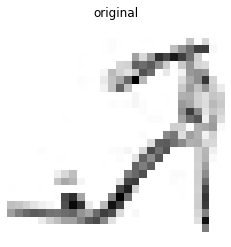

In [27]:
plt.title("original")
showImage(train_X[8])

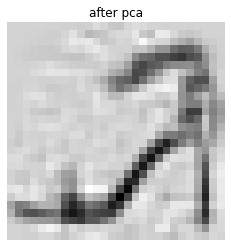

In [28]:
plt.title("after pca")
showImage(X_train_recover[8])

## modeling


In [29]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score


In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Desition Tree Classifaier 

In [31]:
dec_tree_clf = DecisionTreeClassifier(max_depth=50, random_state=42)

In [32]:
dec_tree_clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=50, random_state=42)

In [33]:
#בדיקת תמונה אחת - המודל אכן צודק . 

In [34]:
one_train_predict = dec_tree_clf.predict(train_X[0].reshape(1, -1))

In [35]:
class_names[one_train_predict[0]]

'Ankle boot'

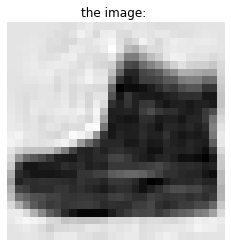

In [36]:
plt.title("the image: ")
showImage(X_train_recover[0])

In [37]:
# נרמול הטסט ובדיקת הציון 

In [38]:
test_X = test_X/255.0

In [39]:
test_X.shape
train_X.shape

test_X = test_X.reshape(len(test_X) , 784)

In [40]:
test_predict = dec_tree_clf.predict(test_X)

dec_tree_accuracy = accuracy_score( test_y , test_predict)

print( "decision tree accuracy:" , dec_tree_accuracy)

decision tree accuracy: 0.7888


## xgboost model:

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [42]:
xgb_clf = XGBClassifier(n_estimators=20, max_depth=5, random_state=42)
# For max_depth parameter, typical values are between 3 to 10
xgb_clf.fit(train_X, train_y)

XGBClassifier(max_depth=5, n_estimators=20, objective='multi:softprob',
              random_state=42)

In [43]:
# Let us predict some instance from the data set using the above trained model
y_train_predict = xgb_clf.predict(train_X[0].reshape(1, -1))

In [44]:
class_names[y_train_predict[0]]

'Ankle boot'

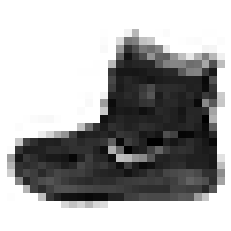

In [45]:
showImage(train_X[0])

In [46]:
# Let us predict all instances of training dataset train_X using the above trained model
y_train_predict = xgb_clf.predict(train_X)

In [47]:
accuracy_score(train_y, y_train_predict)

0.86745

## בחירת המודל הסופית:

In [49]:
our_model = xgb_clf

In [50]:
accuracy_score(train_y, y_train_predict)

0.86745